In [63]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

In [64]:
# Medium epsilon 설정정, index = 굴절률, epsilon = 유전율율
Air = mp.Medium(index=1)
Si = mp.Medium(index=1.46)
SiO2 = mp.Medium(index=3.68)

# 해상도 설정
resolution = 50

# 파장 설정
nm = 1e-3

thickness1 = 0.25*700*nm
thickness2 = 0.5*700*nm

In [69]:
# Geometry 설정
geometry = [
    mp.Block(size = mp.Vector3(2 - thickness1, mp.inf, mp.inf), 
             center = mp.Vector3(-thickness1 + (-2+thickness1)*0.5, 0, 0), 
             material = Air
             ),
    mp.Block(size = mp.Vector3(thickness1, mp.inf, mp.inf), 
             center = mp.Vector3(-0.5*thickness1, 0, 0), 
             material = SiO2
             ),
    mp.Block(size = mp.Vector3(2, mp.inf, mp.inf), 
             center = mp.Vector3(1, 0, 0), 
             material = Si
             )
]

# Cell size 설정
cell_size = mp.Vector3(4, 0, 2)

In [66]:
# EigenModeSource 사용 -> 단일방향으로 전파
fmax = 1/0.69
fmin = 1/0.71

sources = [
    mp.EigenModeSource(
        src = mp.GaussianSource(frequency=(fmax+fmin)/2, fwidth = fmax-fmin),
        center=mp.Vector3(-1.2,0,0),
        size = mp.Vector3(0,0,2),
        direction=mp.X,
        eig_match_freq=True
    )
]

pml_layers = [mp.PML(thickness=0.5, direction=mp.X)]

In [67]:
sim1 = mp.Simulation(
    cell_size=cell_size,
    sources=sources,
    geometry=geometry,
    boundary_layers=pml_layers,
    resolution=resolution
)

sim1.run(until=50)

-----------
Initializing structure...
time for choose_chunkdivision = 3.50475e-05 s
Working in 3D dimensions.
Computational cell is 4 x 0.02 x 2 with resolution 50
     block, center = (-1.0875,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.0875,0,0)
          size (0.175,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13.5424,13.5424,13.5424)
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1316,2.1316,2.1316)
time for set_epsilon = 0.074923 s
-----------
MPB solved for frequency_1(1.42886,0,0) = 1.42886 after 18 iters
run 0 finished at t = 50.0 (5000 timesteps)


     block, center = (-1.0875,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.0875,0,0)
          size (0.175,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13.5424,13.5424,13.5424)
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1316,2.1316,2.1316)


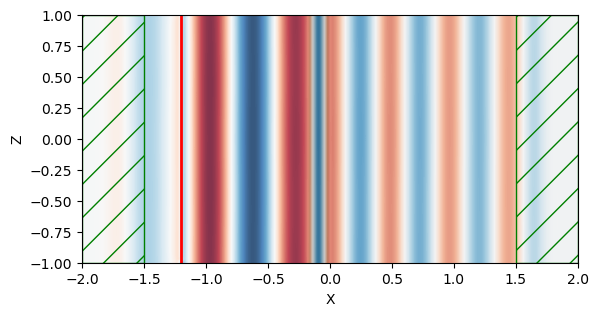

In [68]:
plt.figure(dpi=100)
sim1.plot2D(fields=mp.Ez)
plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 3.09944e-05 s
Working in 3D dimensions.
Computational cell is 4 x 0.02 x 2 with resolution 50
     block, center = (-1.0875,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.0875,0,0)
          size (0.175,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1316,2.1316,2.1316)
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13.5424,13.5424,13.5424)
time for set_epsilon = 0.0743709 s
-----------
MPB solved for frequency_1(1.42886,0,0) = 1.42886 after 18 iters
run 0 finished at t = 50.0 (5000 timesteps)
     block, center = (-1.0875,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diag

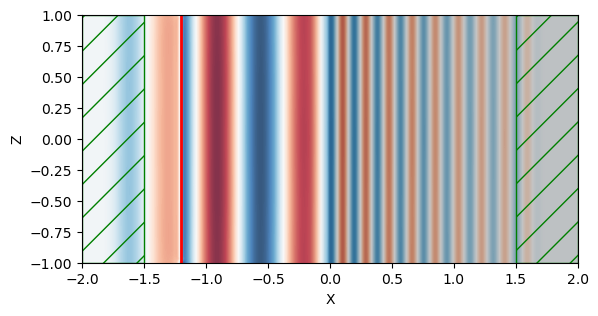

In [70]:
'''
--------------------------------------------------------------------------------------------------------
                                1. 시뮬레이션 영역 설정

시뮬레이션 영역을 설정하는 부분입니다. 
cell은 시뮬레이션 영역의 크기를, resolution은 한 격자가 몇 개의 grid point로 이루어지는지를 설정하는 변수입니다.
--------------------------------------------------------------------------------------------------------
'''

cell = mp.Vector3(4, 0, 2) # x축으로 4um, y축으로 0um, z축으로 2um의 크기를 가지는 시뮬레이션 영역을 설정합니다.
resolution = 50 # 한 격자가 몇 개의 grid point로 이루어지는지를 설정합니다. 100으로 설정하면 한 칸에 100 개의 grid point가 생성됩니다.


'''
--------------------------------------------------------------------------------------------------------
                                2. 물질 영역 설정

물질 영역을 설정하는 부분입니다. 
geometry는 물체의 모양과 위치, 그리고 물질의 종류를 설정하는 변수입니다.
--------------------------------------------------------------------------------------------------------
'''
# mp.Material()을 이용하여 미리 정의된 물질 설정값을 불러올 수도 있지만, 직접 설정할 수도 있습니다. 
# [예시]
# from meep.materials import SiO2
# from meep.materials import Si

# 이번 예제에서는 직접 설정해보겠습니다.

Air = mp.Medium(index = 1) # Air의 굴절률을 1로 설정합니다.
SiO2 = mp.Medium(index = 1.46) # SiO2의 굴절률을 1.46로 설정합니다.
Si = mp.Medium(index = 3.68) # Si의 굴절률을 3.68로 설정합니다.

layer2_length = 0.25 * 0.7

# 문제 상황에서의 물질 영역을 설정합니다. mp.Block()을 이용하여 물체를 블록 형태로 설정할 수 있습니다.
# 물체를 겹치면 이어진 물체로 인식됩니다. 이 예제에서 각 layer는 맞닿아 있는 구조이므로, 정확히 맞닿아 있도록 설정해야 합니다.
geometry = [mp.Block(mp.Vector3(2-layer2_length, mp.inf, mp.inf),
                     center = mp.Vector3(-layer2_length - 0.5*(2-layer2_length), 0, 0),
                     material = mp.Medium(epsilon = 1)),
            mp.Block(mp.Vector3(layer2_length, mp.inf, mp.inf),
                     center = mp.Vector3(-0.5*layer2_length, 0, 0),
                     material = SiO2),
            mp.Block(mp.Vector3(2, mp.inf, mp.inf),
                     center = mp.Vector3(1, 0, 0),
                     material = Si)]


'''
---------------------------------------------------------------------------------------
                                3. 광원 설정

광원을 설정하는 부분입니다. sources는 광원의 종류와 위치, 크기, 그리고 광원의 주파수를 설정하는 변수입니다.
---------------------------------------------------------------------------------------
'''
# EigenModeSource를 이용하여 광원을 설정할 수 있습니다. EigenModeSource는 특정한 주파수에서의 고유모드를 설정할 수 있습니다.

fmax = 1/0.69
fmin = 1/0.71

sources = [
    mp.EigenModeSource(
        src=mp.GaussianSource(frequency=(fmax+fmin)/2, fwidth=fmax-fmin),
        center=mp.Vector3(-1.2, 0, 0),
        size=mp.Vector3(0, 0, 2),
        direction=mp.X,  # This ensures emission in the +x direction
        eig_match_freq=True  # Ensure that the source frequency matches the eigenmode
    )
]


'''
---------------------------------------------------------------------------------------
                                4. 경계 조건 설정

경계 조건을 설정하는 부분입니다. pml_layers는 Perfectly Matched Layer를 설정하는 변수입니다. Perfectly Matched Layer는 시뮬레이션 영역의 경계에서 전자기파가 반사되는 것을 방지하는 역할을 합니다.
---------------------------------------------------------------------------------------
'''

pml_layers = [mp.PML(thickness=0.5, direction = mp.X)]


'''
---------------------------------------------------------------------------------------
                                5. 시뮬레이션 설정

이상 상황에서 설정한 변수들을 이용하여 시뮬레이션 클래스를 설정하는 부분입니다.
---------------------------------------------------------------------------------------
'''

sim1 = mp.Simulation(
    cell_size = cell,
    geometry = geometry,
    sources = sources,
    boundary_layers = pml_layers,
    resolution = resolution
)


'''
---------------------------------------------------------------------------------------
                                6. 시뮬레이션 실행

전체 설정이 완료되었으면, 이제 시뮬레이션을 실행할 차례입니다. run() 메서드를 이용하여 시뮬레이션을 실행할 수 있습니다.
---------------------------------------------------------------------------------------
'''
# until 뒤에 숫자를 설정함으로써 시뮬레이션을 몇 time unit동안 실행할 지 설정합니다. 한 time unit은 실제 시간으로는 0.1초입니다.
# 하지만 PyMEEP에서는 길이 단위가 um이므로, 실제로 한 time unit이 의미하는 시간은 빛이 1 um을 통과하는 시간, 즉 약 3.3 fs입니다.
sim1.run(until=50) 

'''
---------------------------------------------------------------------------------------
sim1.run()을 실행한 후 결과를 확인합니다. 여기에서는 Electric field의 z component를 확인합니다.
---------------------------------------------------------------------------------------
'''

%matplotlib inline
plt.figure(dpi=100)
sim1.plot2D(fields = mp.Ez)
plt.show()